In [55]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import json


resultsDir = Path.cwd()
convNetDir = resultsDir / "convNets.json"
cosSimDir1 = resultsDir / "cosNets1.json"
cosSimDir2 = resultsDir / "cosNets2.json"

data = convNetDir.open("r", encoding="utf-8")
data = json.load(data)
# data2 = cosSimDir2.open("r", encoding="utf-8")
# data2 = json.load(data2)

# for key in data2.keys():
#     data[key] = data2[key]



In [33]:

def plotResults(history,name):
    losses = [entry['val_loss'] for entry in history]
    accuracy = [entry["val_acc"] for entry in history]
    train_loss = [entry["train_loss"] for entry in history]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    fig.suptitle('Model Results')

    ax1.plot(losses, '-o', label="Validation Loss")
    ax1.plot(train_loss, "-s", label="Training Loss")
    ax1.legend()
#     ax1.set_ylim([0,0.])
    ax1.set(xlabel = 'Epoch', ylabel="Loss")

    
    ax2.set(xlabel = 'Epoch', ylabel="Values")
    ax2.plot(accuracy, "-r")

    # plt.legend()
    ax1.set_title('Loss vs. Number of Epochs');
    ax2.set_title("Accuracy on Validation Set");
    plt.savefig("{}-results.png".format(name))
    plt.show()


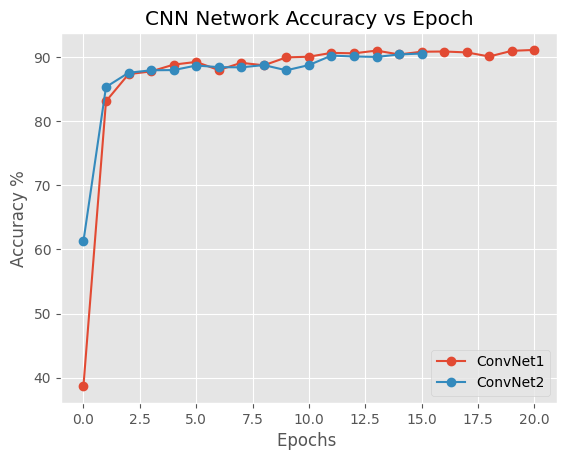

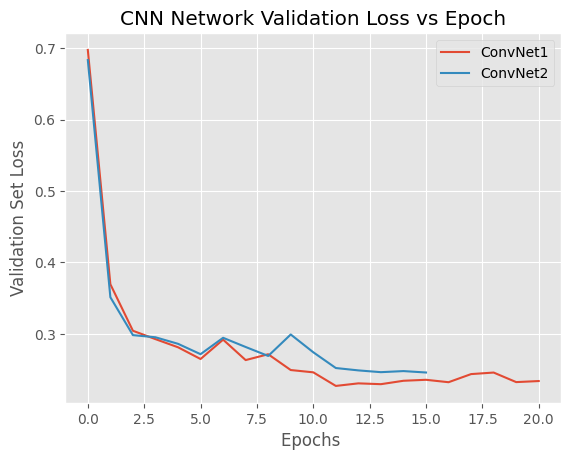

In [86]:
plt.style.use("ggplot")
keys = data.keys()
plt.figure("All plots")
for key in data:
    hist = data[key]
    accuracy = [entry["val_acc"]*100 for entry in hist]
    plt.plot(accuracy, "-o", label=key)
    plt.title("CNN Network Accuracy vs Epoch")

plt.legend()
plt.ylabel("Accuracy %")
plt.xlabel("Epochs ")
plt.show()

plt.figure("All plots")
for key in data:
    hist = data[key]
    name = key
    accuracy = [entry["val_loss"] for entry in hist]
    plt.plot(accuracy, label=name)

plt.legend()
plt.ylabel("Validation Set Loss")
plt.xlabel("Epochs ")
plt.title("CNN Network Validation Loss vs Epoch")

plt.show()


In [87]:
data = cosSimDir1.open("r", encoding="utf-8")
data = json.load(data)

data2 = cosSimDir2.open("r", encoding="utf-8")
data2 = json.load(data2)

for key in data2.keys():
    data[key] = data2[key]

labels = []
accs = []
f1s = []
for key in data:
    hist = data[key]
    labels.append(key)
    f1 = [round(entry["f1"],4)*100 for entry in hist]
    acc = [round(entry["val_acc"],4)*100 for entry in hist]
    accs.append(max(acc))
    f1s.append(max(f1))
    
data = convNetDir.open("r", encoding="utf-8")
data = json.load(data)

for key in data:
    hist = data[key]
    labels.append(key)
    f1 = [round(entry["f1"],4)*100 for entry in hist]
    acc = [round(entry["val_acc"],4)*100 for entry in hist]
    accs.append(max(acc))
    f1s.append(max(f1))
    

In [88]:
print(labels)

['CosSim', 'CosSim2', 'CosSim3', 'ConvNet1', 'ConvNet2']


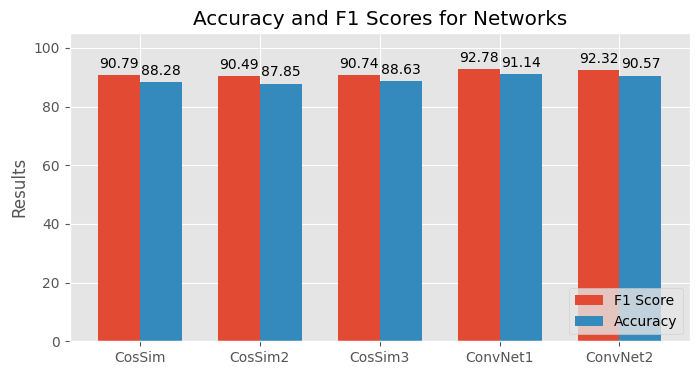

In [98]:
import numpy as np
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))
rects1 = ax.bar(x - width/2, f1s, width, label='F1 Score')
rects2 = ax.bar(x + width/2, accs, width, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Results')
ax.set_title('Accuracy and F1 Scores for Networks')
ax.set_xticks(x, labels)
ax.legend(loc="lower right")
ax.set_ylim([0,105])
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

# fig.tight_layout()

plt.show()